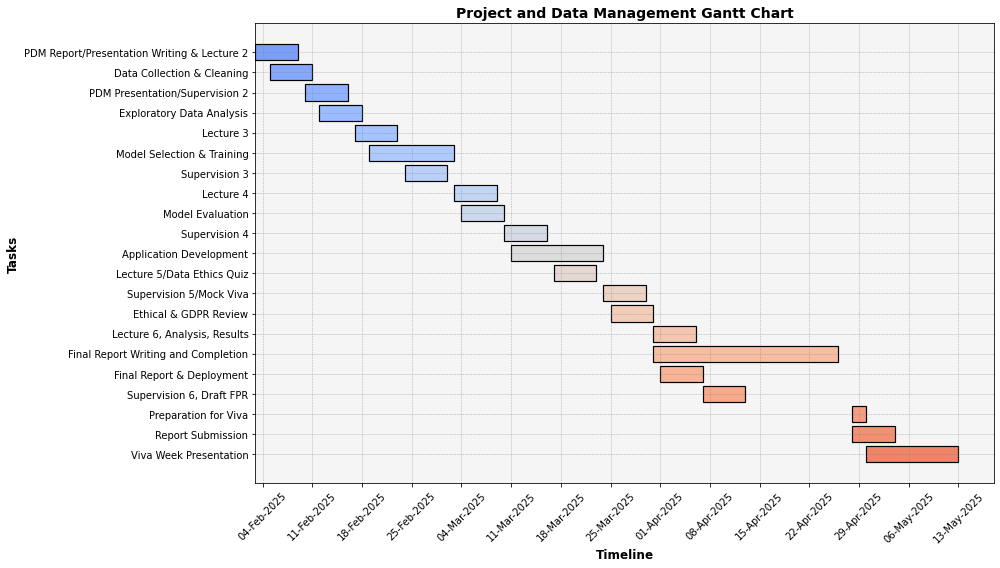

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load dataset
data = {
    "Task": [
        "PDM Report/Presentation Writing & Lecture 2",
        "PDM Presentation/Supervision 2",
        "Lecture 3",
        "Supervision 3",
        "Lecture 4",
        "Supervision 4",
        "Lecture 5/Data Ethics Quiz",
        "Supervision 5/Mock Viva",
        "Lecture 6, Analysis, Results",
        "Supervision 6, Draft FPR",
        "Data Collection & Cleaning",
        "Exploratory Data Analysis",
        "Model Selection & Training",
        "Model Evaluation",
        "Application Development",
        "Ethical & GDPR Review",
        "Final Report & Deployment",
        "Final Report Writing and Completion",
        "Report Submission",
        "Preparation for Viva",
        "Viva Week Presentation",
    ],
    "Start Date": pd.to_datetime([
        "03-Feb-2025", "10-Feb-2025", "17-Feb-2025", "24-Feb-2025", "03-Mar-2025",
        "10-Mar-2025", "17-Mar-2025", "24-Mar-2025", "31-Mar-2025", "07-Apr-2025",
        "05-Feb-2025", "12-Feb-2025", "19-Feb-2025", "04-Mar-2025", "11-Mar-2025",
        "25-Mar-2025", "01-Apr-2025", "31-Mar-2025", "28-Apr-2025", "28-Apr-2025",
        "30-Apr-2025"
    ]),
    "End Date": pd.to_datetime([
        "09-Feb-2025", "16-Feb-2025", "23-Feb-2025", "02-Mar-2025", "09-Mar-2025",
        "16-Mar-2025", "23-Mar-2025", "30-Mar-2025", "06-Apr-2025", "13-Apr-2025",
        "11-Feb-2025", "18-Feb-2025", "03-Mar-2025", "10-Mar-2025", "24-Mar-2025",
        "31-Mar-2025", "07-Apr-2025", "26-Apr-2025", "04-May-2025", "30-Apr-2025",
        "13-May-2025"
    ])
}

df = pd.DataFrame(data)

# Sort tasks so that the earliest one comes first and the latest comes last
df = df.sort_values(by="Start Date", ascending=True)

# Creating a visually appealing Gantt Chart with better Y-axis spacing
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor("#F5F5F5")  # Light background

# Define color scheme with a soft gradient
colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(df)))

# Adjusting Y-axis positions to add spacing
y_positions = np.arange(len(df), 0, -1)  # Ordered properly

# Plot each task as a horizontal bar with spacing
for i, (task, start, end, y_pos) in enumerate(zip(df["Task"], df["Start Date"], df["End Date"], y_positions)):
    ax.barh(y_pos, (end - start).days, left=start, color=colors[i], edgecolor="black", linewidth=1.2)

# Formatting the x-axis with proper date formatting and week intervals
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b-%Y"))
plt.xticks(rotation=45, color="black", fontsize=10)

# Adjusting Y-axis labels to add spacing
ax.set_yticks(y_positions)
ax.set_yticklabels(df["Task"], fontsize=10, color="black")

# Adding Titles and Labels
plt.xlabel("Timeline", color="black", fontsize=12, fontweight="bold")
plt.ylabel("Tasks", color="black", fontsize=12, fontweight="bold")
plt.title("Project and Data Management Gantt Chart", fontsize=14, fontweight="bold", color="black")

# Grid styling for readability
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.6)

# Save the Gantt Chart as an image file
plt.tight_layout()
plt.savefig("Project_Gantt_Chart_Sorted.png", dpi=300, bbox_inches="tight")

# Display the improved Gantt Chart
plt.show()
